In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data1 = pd.read_csv('data/Dataset1.csv').values
data2 = pd.read_csv('data/Dataset2.csv').values

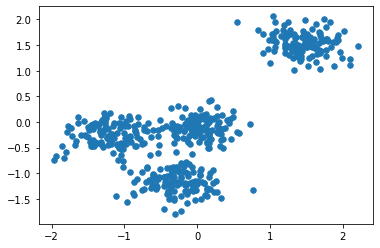

In [13]:
plt.scatter(data1[:, 0], data1[:, 1], s=30)

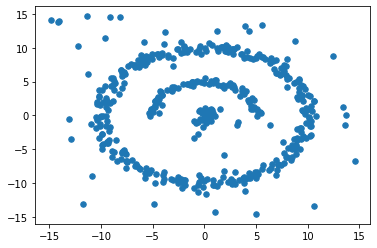

In [14]:
plt.scatter(data2[:, 0], data2[:, 1], s=30)

In [15]:
def Kmeans(k, data, limit):
    
    idx = np.random.choice(data.shape[0], k, replace=False)
    centers = data[idx, :]
    
    labeled = None
    labels = np.arange(len(centers))
    distances = np.zeros((len(labels), len(data)))
    
    for itr in range(limit):
        
        for label in labels:
            distances[label] = np.linalg.norm(data - centers[label], axis=1)
            
        labeled = np.argmin(distances, axis=0)
        for label in labels:
            di = data[np.where(labeled == label)]
            if di.any():
                centers[label] = np.mean(di, axis=0)
          
    return centers, labeled

In [16]:
def err(data, centers, labeled):
    
    labels = np.arange(len(centers))
    erros = []
    
    for label in labels:
        di = data[np.where(labeled == label)]
        ei = np.mean(np.linalg.norm(di - centers[label], axis=1))
        erros += [ei]

    return np.array(erros)

In [17]:
def plot(data, centers, labeled):
    
    # plot data
    plt.scatter(data[:, 0], data[:, 1], s=30, c=labeled)
    
    # plot centers
    plt.scatter(centers[:, 0], centers[:, 1], s=70, c='r', marker='s')     
    
    plt.show()

In [18]:
def test(k, data, limit):
    
    centers, labeled = Kmeans(k, data, limit)
    errs = err(data, centers, labeled)
    clustering_err = np.mean(errs)
    
    print(('k = {}').format(k))
    for i in range(k):
        print(('cluster error for cluster{} : {}').format(i + 1, errs[i]))
    
    print(('clustering error for k = {}: {}').format(k, clustering_err))
        
    plot(data, centers, labeled)


In [21]:
def elbow(data, max_k):
    
    elbow_errs = []
    
    for i in range(1, max_k + 1):
        
        centers, labeled = Kmeans(i, data, 20)
        clustring_err = np.mean(err(data, centers, labeled))
        elbow_errs += [clustring_err]
    
    
    plt.plot(list(range(1, max_k + 1)), elbow_errs)
    plt.savefig('elbow.png')
    plt.show()

k = 2
cluster error for cluster1 : 0.7491160326963786
cluster error for cluster2 : 0.3160088195773474
clustering error for k = 2: 0.532562426136863


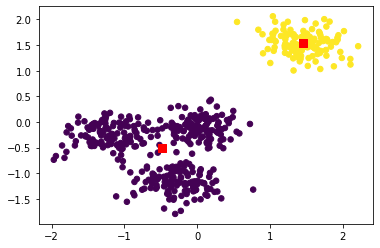

k = 3
cluster error for cluster1 : 0.33987023164913976
cluster error for cluster2 : 0.6163639287851188
cluster error for cluster3 : 0.3160088195773474
clustering error for k = 3: 0.424080993337202


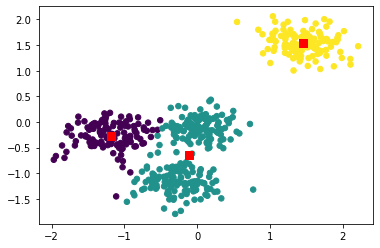

k = 4
cluster error for cluster1 : 0.2886597397595568
cluster error for cluster2 : 0.3238368940541009
cluster error for cluster3 : 0.3361233209400449
cluster error for cluster4 : 0.3160088195773474
clustering error for k = 4: 0.3161571935827625


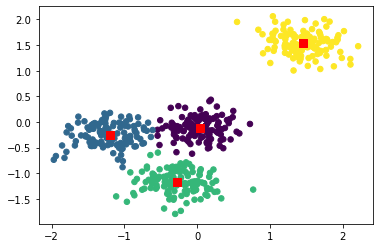

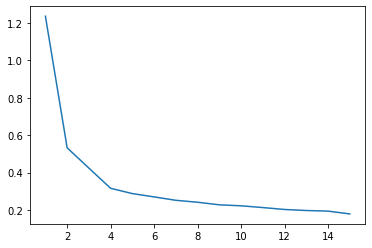

k = 3
cluster error for cluster1 : 5.3354955452057204
cluster error for cluster2 : 5.157451823504142
cluster error for cluster3 : 5.733836186379747
clustering error for k = 3: 5.408927851696537


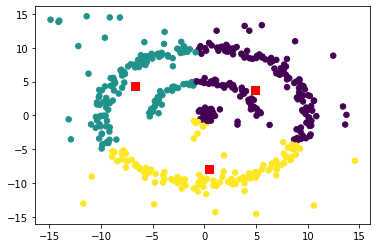

In [22]:
if __name__ == '__main__':
    
    N = 20 # number of iterations

    k = 2
    test(k, data1, N)

    k = 3
    test(k, data1, N)

    k = 4
    test(k, data1, N)

    elbow(data1, 15)
    
    test(3, data2, 15)